<a href="https://colab.research.google.com/github/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/data_collection_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting spu google drive
from google.colab import drive
drive.mount('/content/drive')

########################################

#changing the working directory
import os
os.chdir("/content/drive/MyDrive/EV Charging Station Data")

!pwd

Mounted at /content/drive
/content/drive/MyDrive/EV Charging Station Data


### EV - Market Analysis and Consumer Behavior

This notebook is for exploring  various datasets conducting preliminary exploratory data analysis (EDA) with the objective of understanding if they are suitable for analyzing the Electric Vehicle (EV) market and discerning consumer behavior trends.


> - Data Collection and Integration: Acquisition and integration of different datasets relevant to the EV market and consumer behavior. (datasets may include information on EV sales, charging infrastructure, government incentives, demographic data, consumer surveys, and possibly other related metrics)
> - Data Cleaning and Preparation: Cleaning and preprocessing the collected datasets to ensure data quality and consistency.
> - Preliminary EDA: Conducting the EDA to gain insights into the characteristics and patterns within the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import math

The first dataset that we are going to look at is the **Global Electric Vehicle Market Share** downloaded from [data.world](https://data.world/makeovermonday/2023w7/workspace/file?filename=Global+Electric+Vehicle+Market+Share.xlsx)


Data Source: [Counterpoint Research](https://www.counterpointresearch.com/insights/global-electric-vehicle-market-share/)

In [11]:
data1 = pd.read_excel('https://query.data.world/s/j3zfvtlaqca6nwnhs62wfecky7rduf?dws=00000')
data1

,Brands,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022
0,BYD Auto,0.07,0.11,0.12,0.14,0.16,0.20
1,Tesla,0.15,0.15,0.14,0.16,0.12,0.13
2,Wuling,0.07,0.06,0.05,0.06,0.05,0.05
3,Volkswagen,0.07,0.06,0.05,0.04,0.04,0.04
4,GAC Motor,0.02,0.02,0.02,0.02,0.03,0.03
5,Others,0.62,0.59,0.62,0.59,0.60,0.55


In [12]:
data1.iloc[5] = data1.iloc[2] + data1.iloc[4] + data1.iloc[5]
data1.drop([2, 4], inplace=True)
data1.reset_index(drop=True, inplace=True)
data1['Brands'] = data1['Brands'].replace('WulingGAC MotorOthers', 'Others')
data1['Brands'] = data1['Brands'].replace('Volkswagen', 'Volkswagen Group')
data1



,Brands,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022
0,BYD Auto,0.07,0.11,0.12,0.14,0.16,0.20
1,Tesla,0.15,0.15,0.14,0.16,0.12,0.13
2,Volkswagen Group,0.07,0.06,0.05,0.04,0.04,0.04
3,Others,0.71,0.67,0.69,0.67,0.68,0.63


In [13]:
data2 = pd.read_excel('/content/drive/MyDrive/EV Charging Station Data/Global EV Market Share Q4 2023.xlsx')
data2.head()

,Brands,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023,Q3 2023,Q4 2023
0,BYD Auto,0.10,0.12,0.13,0.15,0.14,0.15,0.17,0.18
1,Tesla,0.21,0.16,0.17,0.17,0.22,0.20,0.17,0.16
2,Volkswagen Group,0.07,0.08,0.07,0.08,0.07,0.07,0.08,0.08
3,Others,0.62,0.64,0.63,0.60,0.57,0.58,0.58,0.58


In [14]:
data1 = data1.drop(columns=['Q1 2022', 'Q2 2022', 'Q3 2022'])
data = pd.merge(data1, data2, on='Brands', how='outer')
data


,Brands,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023,Q3 2023,Q4 2023
0,BYD Auto,0.07,0.11,0.12,0.10,0.12,0.13,0.15,0.14,0.15,0.17,0.18
1,Tesla,0.15,0.15,0.14,0.21,0.16,0.17,0.17,0.22,0.20,0.17,0.16
2,Volkswagen Group,0.07,0.06,0.05,0.07,0.08,0.07,0.08,0.07,0.07,0.08,0.08
3,Others,0.71,0.67,0.69,0.62,0.64,0.63,0.60,0.57,0.58,0.58,0.58


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brands   4 non-null      object 
 1   Q2 2021  4 non-null      float64
 2   Q3 2021  4 non-null      float64
 3   Q4 2021  4 non-null      float64
 4   Q1 2022  4 non-null      float64
 5   Q2 2022  4 non-null      float64
 6   Q3 2022  4 non-null      float64
 7   Q4 2022  4 non-null      float64
 8   Q1 2023  4 non-null      float64
 9   Q2 2023  4 non-null      float64
 10  Q3 2023  4 non-null      float64
 11  Q4 2023  4 non-null      float64
dtypes: float64(11), object(1)
memory usage: 512.0+ bytes


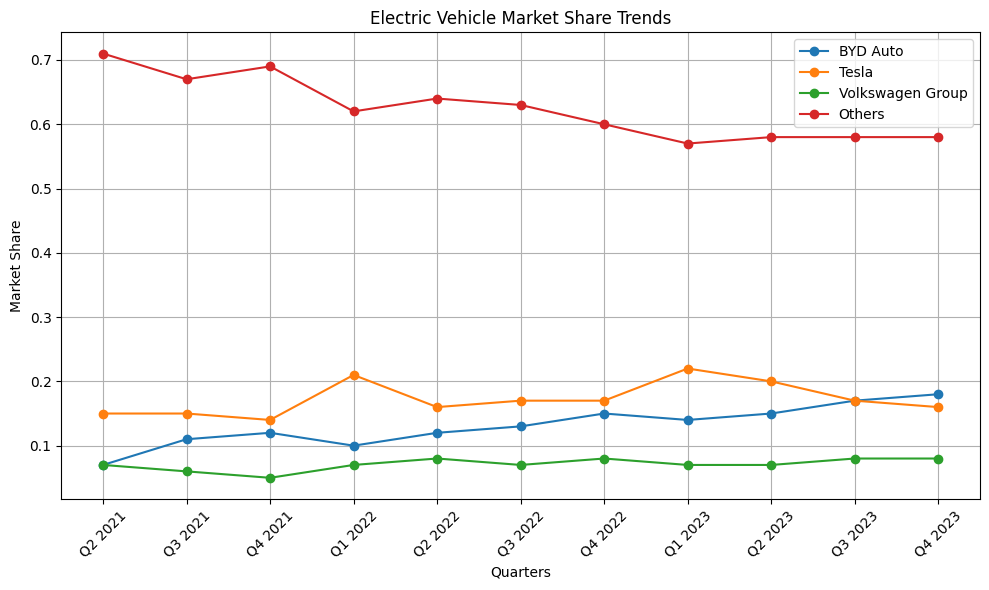

In [16]:
# Plotting market share trends for all brands
plt.figure(figsize=(10, 6))

for index, row in data.iterrows():
    plt.plot(data.columns[1:], row[1:], marker='o', label=row['Brands'])

plt.title('Electric Vehicle Market Share Trends')
plt.xlabel('Quarters')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The plot illustrates the market share trends in the electric vehicle (EV) industry over time, specifically from Q2 2021 to Q4 2023. The market share is represented on the vertical axis, while the quarters are displayed on the horizontal axis.

 Key Observations:

 Others: The category labeled "Others" consistently holds the largest market share throughout the entire period, although it experiences a gradual decline. This suggests that while a significant portion of the market is occupied by various smaller players, their collective dominance is slowly diminishing.

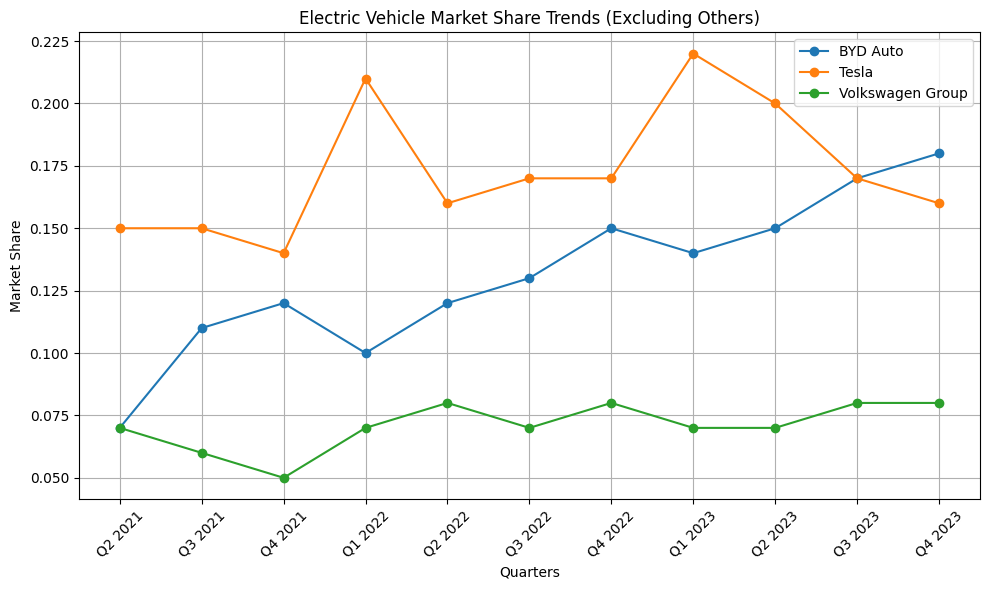

In [17]:
# Market Share trend for only the big Three brands

plt.figure(figsize=(10, 6))

for index, row in data.iterrows():
    if row['Brands'] != 'Others':
        plt.plot(data.columns[1:], row[1:], marker='o', label=row['Brands'])

plt.title('Electric Vehicle Market Share Trends (Excluding Others)')
plt.xlabel('Quarters')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The plot illustrates the electric vehicle (EV) market share trends for three major players: BYD Auto, Tesla, and Volkswagen Group, from the second quarter of 2021 to the fourth quarter of 2023. The market share is calculated excluding other EV manufacturers, focusing on these three.

 Key observations:

 Tesla: Tesla held the largest market share at the beginning of the observed period and saw an overall declining trend. However, it experienced a notable spike in the fourth quarter of 2022 and the first quarter of 2023.

 BYD Auto: BYD Auto started with the smallest market share but consistently grew throughout the timeframe. It surpassed Tesla's market share in the fourth quarter of 2023, becoming the leader in the last quarter of the observed period.

 Volkswagen Group: Volkswagen Group maintained a relatively stable market share throughout, with minor fluctuations and gradual growth over time.

 Overall:

The EV market is dynamic with shifts in market share among the major players.
Tesla and BYD Auto experienced the most significant changes in their market shares during this period.
While Tesla initially dominated the market, BYD Auto's consistent growth led to its leading position by the end of 2023.
Volkswagen Group maintained a stable position with gradual growth.



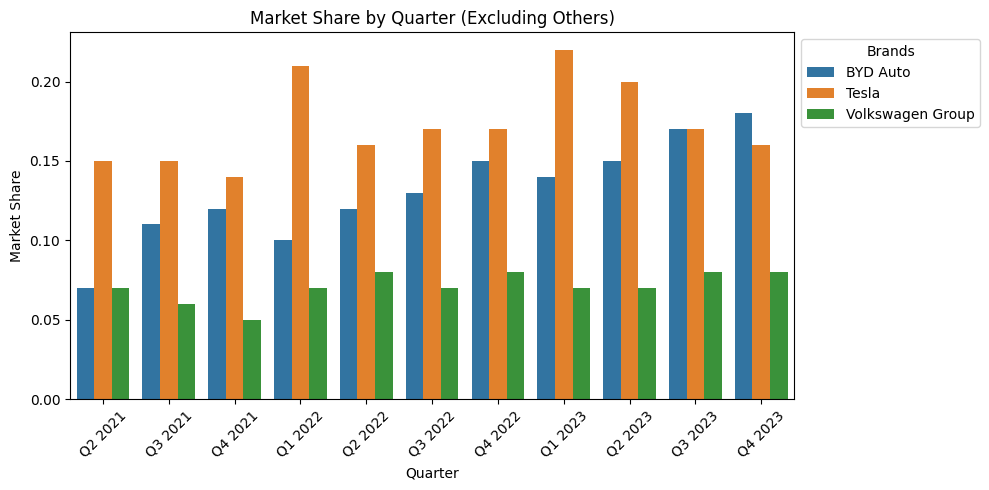

In [20]:

# Filter out the "Others" brand
filtered_data = melted_data[melted_data['Brands'] != 'Others']

# Plot the bar plot without "Others"
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='Market_Share', hue='Brands', data=filtered_data)
plt.title('Market Share by Quarter (Excluding Others)')
plt.xlabel('Quarter')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(title='Brands', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Key observations:

BYD Auto:
Experienced significant growth, starting from a relatively lower market share in Q2 2021 and reaching a peak in Q1 2023.
Maintained a strong market share throughout the displayed period.
Tesla:
Started with the highest market share in Q2 2021 but experienced fluctuations throughout the following quarters.
Notably, Tesla's market share dipped below BYD's in Q4 2022 and Q1 2023.
Volkswagen Group:
Consistently held the smallest market share among the three brands.
Demonstrated slow and steady growth throughout the period.
 Overall:

 The plot reveals a dynamic market landscape, with BYD Auto's impressive growth, Tesla's fluctuating performance, and Volkswagen Group's consistent but slower progress. The data suggests a shift in market dominance, with BYD Auto emerging as a strong contender against the established player, Tesla.

The dataset that we are going to look at is called **IEA Global EV Dataset** which is part of the Global EV Data Explorer, developed by the **International Energy Agency (IEA)**, provides a comprehensive view of historical and projected data related to electric vehicles (EVs).

**Data Coverage:**
- Explore information on EV sales, stock, charging infrastructure, and oil displacement.
- The data is regularly updated, with the most recent update on April 26, 2023 <br> <br>

**Data Variables Description:**
- **Region:** This column denotes the geographic region to which the data pertains. In the provided sample, the region is "Australia".
- **Category:** This column categorizes the type of data. In the sample, it includes historical data related to electric vehicle (EV) stock and EV sales.
- **Parameter:** This column specifies the specific parameter being measured or described in the dataset. Examples include "EV stock" and "EV sales share".
- **Mode:** This column indicates different modes of operation or aspects related to electric vehicles. In the sample, it includes "Cars".
- **Powertrain:** This column describes the type of powertrain used in the electric vehicles. In the sample, it includes "BEV" (Battery Electric Vehicle).
- **Year:** This column denotes the year to which the data corresponds. In the sample, it ranges from 2011 to 2012.
- **Unit:** This column specifies the unit of measurement for the corresponding 'value' variable. In the sample, it includes "Vehicles" and "percent".
- **Value:** This column contains the actual numerical values of the data being measured or described in the dataset. It represents the number of vehicles or percentages, depending on the unit specified.

In [21]:
data = pd.read_csv("IEA Global EV Data 2024.csv")
data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [23]:
#lets loook at all the columns' names and their datatypes:
for column_name in list(data.columns):
  datatype = data[f"{column_name}"].dtype
  print(f"{column_name}  --> {datatype}")

region  --> object
category  --> object
parameter  --> object
mode  --> object
powertrain  --> object
year  --> int64
unit  --> object
value  --> float64


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [25]:
# Explore unique values of categorical variables
print("Unique regions:", data['region'].unique())
print("Unique categories:", data['category'].unique())
print("Unique parameters:", data['parameter'].unique())
print("Unique modes:", data['mode'].unique())
print("Unique powertrains:", data['powertrain'].unique())
print("Unique years:", data['year'].unique())
print("Unique units:", data['unit'].unique())


Unique regions: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
Unique categories: ['Historical' 'Projection-STEPS' 'Projection-APS']
Unique parameters: ['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
Unique modes: ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
Unique powertrains: ['EV' 'BEV' 'PHEV' 'Publicly available fast' 'Publicly available slow'
 'FCE

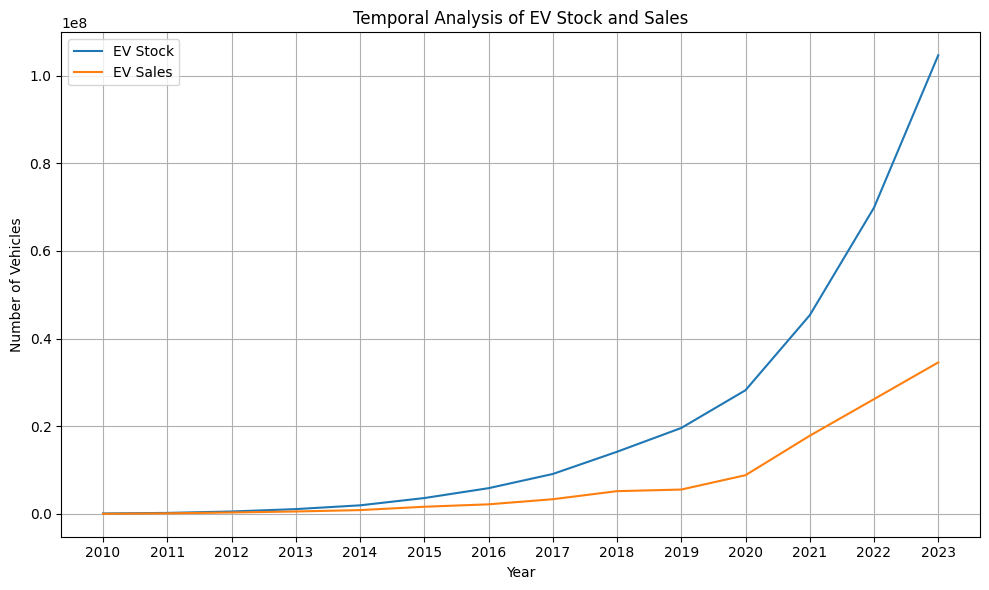

In [32]:
# Filtering data for EV stock and sales
ev_stock = data[(data['parameter'] == 'EV stock') & (data['category'] == 'Historical')]
ev_sales = data[(data['parameter'] == 'EV sales') & (data['category'] == 'Historical')]

# Grouping data by year and calculate total EV stock and sales for each year
ev_stock_yearly = ev_stock.groupby('year')['value'].sum()
ev_sales_yearly = ev_sales.groupby('year')['value'].sum()


plt.figure(figsize=(10, 6))

plt.plot(ev_stock_yearly.index, ev_stock_yearly.values, label='EV Stock')
plt.plot(ev_sales_yearly.index, ev_sales_yearly.values, label='EV Sales')

plt.title('Temporal Analysis of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)

plt.xticks(ev_stock_yearly.index)
plt.tight_layout()
plt.show()


The chart illustrates the temporal evolution of Electric Vehicle (EV) stock and sales from 2010 to 2023. Here's an interpretation:

 EV Stock (Blue line): Represents the total number of electric vehicles in use (cumulative sales) over time.

Trend: The EV stock has grown exponentially, starting from almost zero in 2010 to a substantial number in 2023 (close to 100 million). This indicates a rapid increase in EV adoption over the years.
 EV Sales (Yellow line): Represents the number of electric vehicles sold each year.

Trend: EV sales show a steady increase over time, with a steeper rise in the later years. The sharp increase in 2021, 2022 and 2023 suggests a significant acceleration in the market adoption of EVs.
 Key Insights:

Exponential Growth: The overall trend indicates the exponential growth of the EV market, both in terms of cumulative stock and annual sales.
Increasing Adoption Rate: The sales figures show that the rate at which consumers are adopting EVs is increasing, especially in recent years.
Market Maturity: The graph suggests that the EV market is still in a growth phase, with significant potential for further expansion in the coming years.
 Additional Considerations:

The data does not distinguish between different types of EVs (e.g., battery electric vehicles, plug-in hybrids) or varying vehicle classes (e.g., cars, trucks, buses). This would offer a more nuanced understanding of market dynamics.
The reasons behind the trends are not explicitly shown in the chart. These could include factors like government incentives, falling battery prices, increasing environmental awareness, and expanding charging infrastructure.
 Overall, the chart paints a positive picture of the EV market's progress, showcasing rapid growth and increasing adoption. However, for a deeper understanding, it would be helpful to analyze the underlying factors driving these trends and explore the different segments of the EV market.

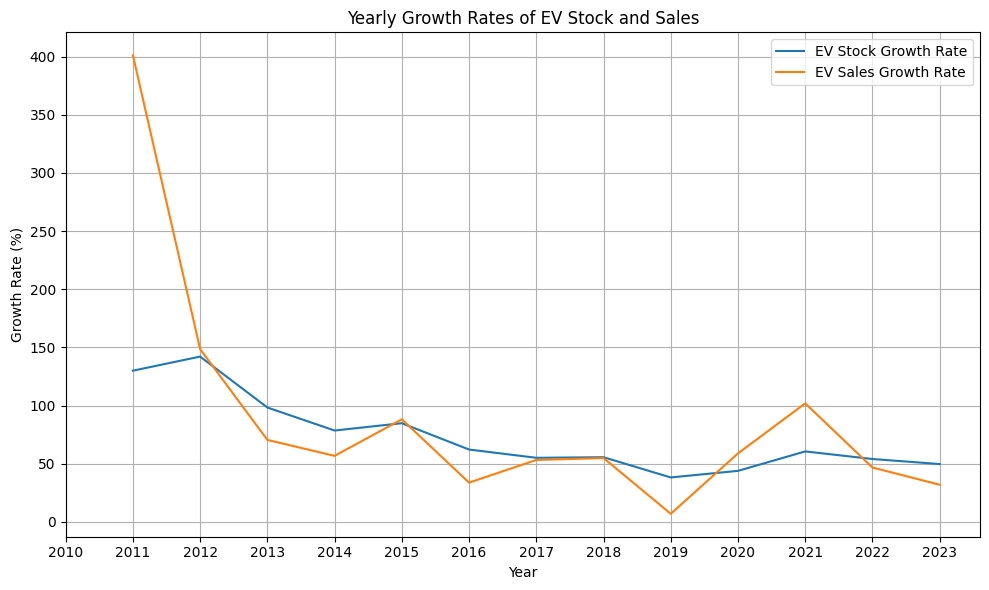

In [33]:
# Yearly Growth Rates
ev_stock_yearly_growth = ev_stock_yearly.pct_change() * 100
ev_sales_yearly_growth = ev_sales_yearly.pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(ev_stock_yearly_growth.index, ev_stock_yearly_growth.values, label='EV Stock Growth Rate')
plt.plot(ev_sales_yearly_growth.index, ev_sales_yearly_growth.values, label='EV Sales Growth Rate')
plt.title('Yearly Growth Rates of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(ev_stock_yearly_growth.index)
plt.tight_layout()
plt.show()

The chart titled "Yearly Growth Rates of EV Stock and Sales" displays the annual percentage change in both the total number of electric vehicles (EVs) in use (stock) and the number of EVs sold (sales) from 2010 to 2023.

 EV Stock Growth Rate (Blue Line):

Initially high: In 2011, the growth rate is above 125%, indicating a rapid expansion of the total number of EVs in use. This is likely due to the market's nascent stage, where even small increases in sales result in large percentage growth rates.
Declining trend: Over time, the stock growth rate decreases, stabilizing around 40-60% in the later years (2017-2023). This suggests that while the EV market is still growing, the rate of expansion is slowing down as the market matures.
 EV Sales Growth Rate (Orange Line):

Fluctuating pattern: The sales growth rate exhibits more volatility compared to the stock growth rate. It peaks in 2011 and 2021 and experiences a significant dip in 2019 and 2020.
Overall declining trend: Despite the fluctuations, the sales growth rate also shows a general downward trend, similar to the stock growth rate. This indicates that while the number of EVs sold each year is increasing, the rate of increase is becoming less steep.
 Key Insights:

* Market Growth: Both stock and sales growth rates are positive throughout the period, demonstrating the overall growth of the EV market.
Maturing Market: The declining growth rates suggest that the EV market is maturing. The initial high growth rates are no longer sustainable as the market becomes more established.
External Factors: The fluctuations in sales growth rates could be attributed to various external factors such as changes in government incentives, economic conditions, technological advancements, and consumer sentiment.
* Interconnectedness: The stock growth rate and sales growth rate are interconnected. A higher sales growth rate in one year often translates to a higher stock growth rate in subsequent years as more EVs enter the market.
 Important Note: This chart focuses on growth rates rather than absolute numbers. While growth rates are declining, the actual number of EVs in use and sold is still increasing, just at a slower pace compared to the early years of the market.

 Understanding these trends is crucial for various stakeholders in the EV ecosystem, including manufacturers, policymakers, investors, and infrastructure providers. It helps them make informed decisions about production targets, investment strategies, policy interventions, and infrastructure development to support the continued growth of the EV market.

In [ ]:
# Electricity Demand and EV Adoption

# Filtering data for Electricity Demand and EV Sales
electricity_demand = data[(data['parameter'] == 'Electricity demand') & (data['category'] == 'Historical')]
ev_sales = data[(data['parameter'] == 'EV sales') & (data['category'] == 'Historical')]


fig = make_subplots(rows=1, cols=2, subplot_titles=('Electricity Demand', 'EV Sales'))

# Adding bar graphs to subplots
fig.add_trace(go.Bar(x=electricity_demand['year'], y=electricity_demand['value'], name='Electricity Demand'), row=1, col=1)
fig.add_trace(go.Bar(x=ev_sales['year'], y=ev_sales['value'], name='EV Sales'), row=1, col=2)


fig.update_layout(title='Electricity Demand and EV Adoption Over Time',
                  xaxis=dict(title='Year'),
                  yaxis=dict(title='Value'),
                  barmode='group')


fig.show()

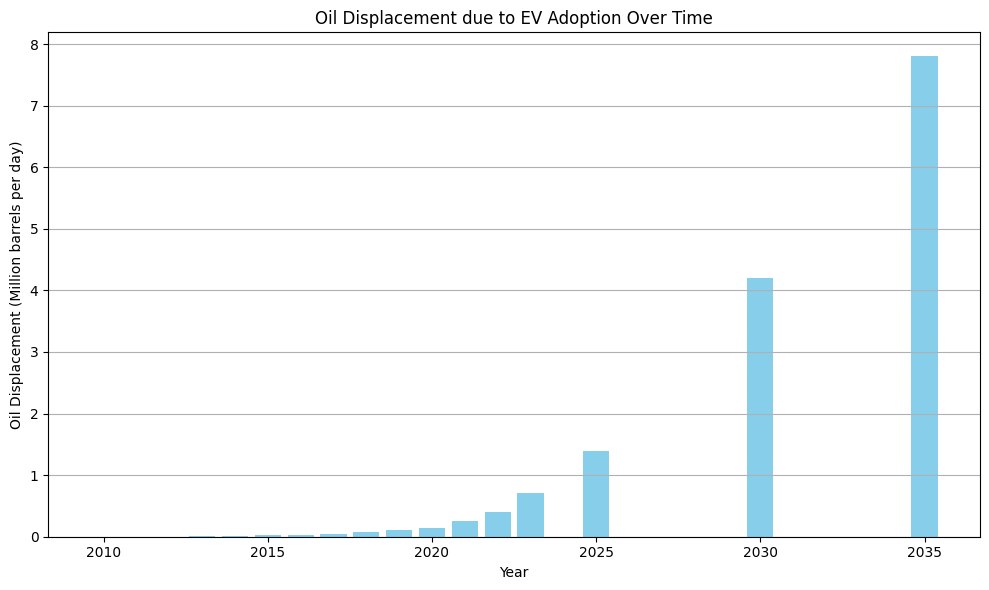

In [ ]:
# Oil Displacement Over Time
oil_displacement = data[data['parameter'] == 'Oil displacement Mbd']

plt.figure(figsize=(10, 6))
plt.bar(oil_displacement['year'], oil_displacement['value'], color='skyblue')
plt.title('Oil Displacement due to EV Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Oil Displacement (Million barrels per day)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Comparing EV Adoption Across Regions

# Filtering data for EV stock
ev_stock = data[(data['parameter'] == 'EV stock') & (data['category'] == 'Historical')]

# Aggregating EV stock by year and region
ev_stock_agg = ev_stock.groupby(['year', 'region'])['value'].sum().reset_index()


fig = px.bar(ev_stock_agg, x='year', y='value', color='region',
             labels={'value': 'EV Stock', 'year': 'Year'},
             title='EV Adoption Across countries Over Time',
             barmode='stack')
fig.update_layout(xaxis=dict(type='category'))
fig.show()


In [ ]:
# Filter the data for EV sales
ev_sales_data = data[(data['parameter'] == 'EV sales') & (data['unit'] == 'Vehicles')]

def create_choropleth():
    # filtered_data = ev_sales_data.copy()

    fig = px.choropleth(ev_sales_data,
                        locations='region',
                        locationmode='country names',
                        color='value',
                        color_continuous_scale='Viridis',
                        hover_name='region',
                        projection='natural earth',
                        title='EV Sales',
                        animation_frame='year',
                        labels={'value': 'EV Sales', 'year': 'Year'},
                        )
    fig.update_layout(updatemenus=[
        dict(
            buttons=[
                dict(label='BEV',
                     method='update',
                )
                for year in ev_sales_data['powertrain'].unique()
            ],
            direction='down',
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.15,
            yanchor='top'
        ),
        dict(
            buttons=[
                dict(label= 'Year',
                     method='animate',
                     args=[None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 300}}])
                for year in ev_sales_data['year'].unique()
            ],

        )
    ])

    fig.show()


create_choropleth()

In [ ]:

#Comparison of EV Sales Share Across Regions

# Filtering the data to include only rows where parameter is 'EV sales share'
ev_sales_share_data = data[data['parameter'] == 'EV sales share']

# Grouping the data by region and year, then calculating the mean sales share for each region
mean_sales_share_by_region = ev_sales_share_data.groupby(['region', 'year'])['value'].mean().reset_index()


fig = px.bar(mean_sales_share_by_region, x='year', y='value', color='region',
             title='Comparison of EV Sales Share Across Regions',
             labels={'year': 'Year', 'value': 'EV Sales Share (%)', 'region': 'Region'},
             barmode='group')

fig.show()

In [ ]:
# Distribution of Powertrain Types Over Years

# Filtering the data for the relevant parameters and years
filtered_data = data[(data['parameter'] == 'EV stock') & (data['year'] >= 2010)]
pivot_data = filtered_data.pivot_table(index='year', columns='powertrain', values='value', aggfunc='sum', fill_value=0)
powertrains = pivot_data.columns.tolist()

# Creatinng a bar trace for each powertrain type
traces = []
for powertrain in powertrains:
    trace = go.Bar(
        x=pivot_data.index,
        y=pivot_data[powertrain],
        name=powertrain
    )
    traces.append(trace)

# Plotting the grouped bar chart using Plotly
layout = go.Layout(
    title='Distribution of Powertrain Types Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack'
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [ ]:
# Distribution of Powertrain Types Over Years filtered by Region

# Filtering the data for the relevant parameters and years
filtered_data = data[(data['parameter'] == 'EV stock') & (data['year'] >= 2010)]
# Pivot the data to get counts of each powertrain type for each region and year
pivot_data = filtered_data.pivot_table(index='year', columns='powertrain', values='value', aggfunc='sum', fill_value=0)
# Creating a list of powertrain types
powertrains = pivot_data.columns.tolist()

# Creatinng a bar trace for each powertrain type
traces = []
for powertrain in powertrains:
    trace = go.Bar(
        x=pivot_data.index,
        y=pivot_data[powertrain],
        name=powertrain
    )
    traces.append(trace)

# Plotting the grouped bar chart using Plotly
layout = go.Layout(
    title='Distribution of Powertrain Types Over Years by Region',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack'
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


In [ ]:
# Filter data for EV adoption by different vehicle modes
ev_data = data[data['parameter'] == 'EV stock']

# Group data by year and mode, summing up the values
grouped_data = ev_data.groupby(['year', 'mode'])['value'].sum().reset_index()

# Create a stacked bar graph
fig = go.Figure()

for mode in grouped_data['mode'].unique():
    mode_data = grouped_data[grouped_data['mode'] == mode]
    fig.add_trace(go.Bar(
        x=mode_data['year'],
        y=mode_data['value'],
        name=mode
    ))

fig.update_layout(
    barmode='stack',
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis_title='Year',
    yaxis_title='Number of Electric Vehicles',
    legend_title='Vehicle Mode'
)

fig.show()

In [ ]:
# Filter data for EV stock
ev_stock_data = data[data['parameter'] == 'EV stock']

# Group data by year and mode, summing up the values
grouped_data = ev_stock_data.groupby(['year', 'mode'])['value'].sum().reset_index()

# Get unique modes and years
modes = grouped_data['mode'].unique()
years = grouped_data['year'].unique()

# Create a list to hold traces for each mode
traces = []

# Iterate over modes and create a trace for each mode
for mode in modes:
    mode_data = grouped_data[grouped_data['mode'] == mode]
    trace = go.Bar(
        x=mode_data['year'],
        y=mode_data['value'],
        name=mode
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Electric Vehicles'),
    barmode='stack'
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
data['parameter'].unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [ ]:
# Filter data for EV stock
filtered_data = data[(data['parameter'] == 'EV sales') & (data['year'] >= 2010)]

# Pivot the data to get counts of each mode type for each region and year
pivot_data = filtered_data.pivot_table(index='year', columns=['region', 'mode'], values='value', aggfunc='sum', fill_value=0)

# Creating a list of mode types
modes = pivot_data.columns.get_level_values('mode').unique().tolist()

# Creating a dropdown menu for region selection
region_dropdown = [{'label': region, 'method': 'update', 'args': [{'visible': [region in button for button in pivot_data.columns.get_level_values('region').unique().tolist()]}]} for region in pivot_data.columns.get_level_values('region').unique().tolist()]

# Creating traces for each mode type and region
traces = []
for mode in modes:
    for region in pivot_data.columns.get_level_values('region').unique().tolist():
        if (region, mode) in pivot_data.columns:
            trace = go.Bar(
                x=pivot_data.index,
                y=pivot_data[region, mode],
                name = mode,
                visible=(region == pivot_data.columns.get_level_values('region').unique().tolist()[0])  # Show the first region by default
            )
            traces.append(trace)

# The layout including the title, axis labels, and dropdown menu
layout = go.Layout(
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack',
    updatemenus=[{'buttons': region_dropdown, 'direction': 'down', 'showactive': True}]
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

Dataset1: The role of gender in consumer markets for electric vehicles - https://datadryad.org/stash/dataset/doi:10.25338/B80P8D

Data Description:

- Data sourced from households who purchased at least one new household vehicle since January 2008
- Questionnaire administered online
- Survey conducted in specific US states: California, Connecticut, Delaware,Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Oregon, Rhode Island, Vermont, and Washington
- Most states are "ZEV states" following California's Zero Emission Vehicle (ZEV) Mandate
- Non-ZEV states included for regional analysis or significance to the initial launch of retail ZEV sales in 2011
- Primary regional analysis focused on Northeast States for Coordinated Air Use Management (NESCAUM)
- NESCAUM member states: Connecticut, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, and Vermont
- Total sample size: 5,654 across all states

In [ ]:
#lets read the datasets into pandas dataframes:
CA_dataset = pd.read_csv("/content/drive/MyDrive/EV Charging Station Data/CA_ZEV_Survey_12-07-20.csv")
DE_dataset = pd.read_csv("/content/drive/MyDrive/EV Charging Station Data/DE_ZEV_Survey_12-07-20.csv")
MA_dataset = pd.read_csv("/content/drive/MyDrive/EV Charging Station Data/MA_ZEV_Survey_12-07-20.csv")
MD_dataset = pd.read_csv("/content/drive/MyDrive/EV Charging Station Data/MD_ZEV_Survey_12-07-20.csv")
NJ_dataset = pd.read_csv("/content/drive/MyDrive/EV Charging Station Data/NJ_ZEV_Survey_12-07-20.csv")
NY_dataset = pd.read_csv("/content/drive/MyDrive/EV Charging Station Data/NY_ZEV_Survey_12-07-20.csv")
OR_dataset = pd.read_csv("/content/drive/MyDrive/EV Charging Station Data/OR_ZEV_Survey_12-07-20.csv")
WA_dataset = pd.read_csv("/content/drive/MyDrive/EV Charging Station Data/WA_ZEV_Survey_12-07-20.csv")



### **Data Cleaning**:

We need to clean out the dataset, removing a bunch of columns that are not going to be usefull for our analylsis and the unsupervised exploratory data analysis. Afterwards, we are also going to also currate the variable descriptions from the JMP files to the CSV here in the jupyter notebook.

In [ ]:
#lets just take a look the CA_dataset

CA_dataset.head()

,Response ID..,"No Trucks, Plus Incentives: drivetrain design 1","No Trucks, Plus Incentives: drivetrain design 2","No Trucks, Plus Incentives: drivetrain design 3","No Trucks, Plus Incentives: drivetrain design 4","No trucks, plus incentives: drivetrain design",Respondent Education,rRespondent Education,Respondent Gender,Respondent Sex,...,w Non-ZEV: maintenance cost,w Non-ZEV: fuel cost,w Non-ZEV: lifestyle,w Non-ZEV: charge/fuel time,w Non-ZEV: range,w Non-ZEV: fuel safety,w Non-ZEV: environmental concerns,w Non-ZEV: battery concerns,w Non-ZEV: reliability,w Non-ZEV: higher incentives
0,40,HEV,NaN,NaN,NaN,HEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Female,Female,...,0.0,0.0,0.0,5.490969,5.490969,0.0,0.0,0.0,0.0,NaN
1,36,HEV,NaN,NaN,NaN,HEV,College Graduate,College Graduate,Male,Male,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
2,32,PHEV,NaN,NaN,NaN,PHEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,48,EV,NaN,NaN,NaN,EV,High School Graduate or GED,High school or less,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,50,EV,NaN,NaN,NaN,EV,Some Graduate School,Some Graduate School,Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
#for this dataset, lets take a look at the number of columns/variables and rows/records we are working with
CA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 197 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(156), int64(1), object(40)
memory usage: 2.5+ MB


In [ ]:
#lets take a look at the rows and columns of all the datasets:
# Print info for each dataset
print("CA_dataset info:")
print(CA_dataset.info())
print("\nDE_dataset info:")
print(DE_dataset.info())
print("\nMA_dataset info:")
print(MA_dataset.info())
print("\nMD_dataset info:")
print(MD_dataset.info())
print("\nNJ_dataset info:")
print(NJ_dataset.info())
print("\nNY_dataset info:")
print(NY_dataset.info())
print("\nOR_dataset info:")
print(OR_dataset.info())
print("\nWA_dataset info:")
print(WA_dataset.info())

CA_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 197 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(156), int64(1), object(40)
memory usage: 2.5+ MB
None

DE_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 190 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(149), int64(2), object(39)
memory usage: 297.0+ KB
None

MA_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Columns: 192 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(153), int64(1), object(38)
memory usage: 747.1+ KB
None

MD_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Columns: 194 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(155), int64(2), object(37)
memory usage: 600.3+ KB
None

NJ_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 

From the above, we can see that we have varying number of variable in the datasets. So before we start cleaningout the datasets and mearging them, it would be best to know the unique variables that are not available in other dataset and the common columns/variables in all the datasets.

In [ ]:
# We are going to create 2 list of column names, common colums among all the datasets and non-common columns

# Extract column names
column_names = {
    "CA": set(CA_dataset.columns),
    "DE": set(DE_dataset.columns),
    "MA": set(MA_dataset.columns),
    "MD": set(MD_dataset.columns),
    "NJ": set(NJ_dataset.columns),
    "NY": set(NY_dataset.columns),
    "OR": set(OR_dataset.columns),
    "WA": set(WA_dataset.columns)
}

# Common column names
common_columns = set.intersection(*column_names.values())

# Columns not common in all datasets
not_common_columns = set.union(*column_names.values()) - common_columns

In [ ]:
#for each not common column name, we are going to print out the datasets it's in:

for column in not_common_columns:
    print(f"\nColumn: {column}")
    for dataset, columns in column_names.items():
        if column in columns:
            print(f"- Dataset: {dataset}")


Column: rRespondent Education
- Dataset: CA
- Dataset: MA
- Dataset: NY
- Dataset: OR
- Dataset: WA

Column: Driving exp: BEV (trunc)
- Dataset: WA

Column: Familiarity Factor3: ICEV imp
- Dataset: NJ

Column: Enviro Factor1b
- Dataset: CA

Column: Prior PEV Factor2: time range price imp
- Dataset: OR

Column: Prior FCV Factor2: safety reliability imp
- Dataset: DE
- Dataset: MA
- Dataset: NJ
- Dataset: NY

Column: rConsiderFCV
- Dataset: CA
- Dataset: DE
- Dataset: NJ

Column: Envi Factor2: risk imp
- Dataset: DE
- Dataset: MA
- Dataset: MD
- Dataset: NY
- Dataset: OR

Column: rrConsiderEV
- Dataset: NY

Column: Daily flexibility 2
- Dataset: NY

Column: Familiarity Factor2: ICEV imp
- Dataset: MA
- Dataset: MD
- Dataset: NY
- Dataset: OR
- Dataset: WA

Column: Familiarity Factor2: FCV imp
- Dataset: NJ

Column: Driving exp: EV (trunc)
- Dataset: CA
- Dataset: DE
- Dataset: MA
- Dataset: MD
- Dataset: NJ
- Dataset: NY
- Dataset: OR

Column: Envi Factor2: risk
- Dataset: NJ

Column: P

We are not going to give much attention to the uncommon variable

We are going to remove the truncated columns and some columns that we dont have any use of

In [ ]:
# Filter out column names containing "(trunc)"
common_columns_filtered = [col for col in common_columns if "(trunc)" not in col]


# List of variables to remove
variables_to_remove = [
    'Seen Public EVSEs yes/no'
    'Base body size',
    'No Trucks, Plus Incentives: drivetrain design 1',
    'No Trucks, Plus Incentives: drivetrain design 2',
    'No Trucks, Plus Incentives: drivetrain design 3',
    'No Trucks, Plus Incentives: drivetrain design 4',
    'FCV: fueling time',
    'Consider an FCV',
    'Driving exp: FCV',
    'Familiarity: FCVs',
    'FCV: public refueling',
    'FCV: purchase price',
    'FCV: range',
    'FCV: reliability',
    'FCV: safety',
    'w Non-ZEV: battery concerns',
    'w Non-ZEV: charge/fuel time',
    'w Non-ZEV: electricity supply',
    'w Non-ZEV: environmental concerns',
    'w Non-ZEV: fuel cost',
    'w Non-ZEV: fuel safety',
    'w Non-ZEV: higher incentives',
    'w Non-ZEV: impression',
    'w Non-ZEV: lifestyle',
    'w Non-ZEV: limited fuel network',
    'w Non-ZEV: looks',
    'w Non-ZEV: maintenance cost',
    'w Non-ZEV: no home charge or fuel',
    'w Non-ZEV: purchase cost',
    'w Non-ZEV: range',
    'w Non-ZEV: reliability',
    'w Non-ZEV: unfamiliar technology',
    'w Non-ZEV: vehicle safety',
    'w Pro-ZEV: air quality',
    'w Pro-ZEV: climate change',
    'w Pro-ZEV: comfortable',
    'w Pro-ZEV: fuel cost',
    'w Pro-ZEV: fun',
    'w Pro-ZEV: home charge convenience',
    'w Pro-ZEV: impression',
    'w Pro-ZEV: incentives',
    'w Pro-ZEV: lifestyle',
    'w Pro-ZEV: looks',
    'w Pro-ZEV: maintenance cost',
    'w Pro-ZEV: money to oil producers',
    'w Pro-ZEV: oil imports',
    'w Pro-ZEV: purchase cost',
    'w Pro-ZEV: safer',
    'w Pro-ZEV: tech',

]

# Filter out variables to remove from common_columns_filtered
common_columns_filtered = [col for col in common_columns_filtered if col not in variables_to_remove]

# Sort common_columns_filtered alphabetically
common_columns_filtered.sort()

# Move 'Response ID..' to the beginning of the list
common_columns_filtered.insert(0, common_columns_filtered.pop(common_columns_filtered.index('Response ID..')))


In [ ]:
# Lets first filter the datasets to only havr the common variables
CA_dataset = CA_dataset[list(common_columns_filtered)]
DE_dataset = DE_dataset[list(common_columns_filtered)]
MA_dataset = MA_dataset[list(common_columns_filtered)]
MD_dataset = MD_dataset[list(common_columns_filtered)]
NJ_dataset = NJ_dataset[list(common_columns_filtered)]
NY_dataset = NY_dataset[list(common_columns_filtered)]
OR_dataset = OR_dataset[list(common_columns_filtered)]
WA_dataset = WA_dataset[list(common_columns_filtered)]


CA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID..                                       1671 non-null   int64  
 1   Air pollution: lifesyle                             1671 non-null   float64
 2   Air pollution: personal worry                       1671 non-null   float64
 3   Air pollution: regional threat                      1671 non-null   float64
 4   Base body size                                      1671 non-null   object 
 5   Base body size 2                                    1653 non-null   object 
 6   Climate change: lifestyle                           1523 non-null   float64
 7   Commute                                             1671 non-null   object 
 8   Consider an EV                                      1671 non-null   object 
 9

We will merge the datasets! and start doing some preliminary EDA

In [ ]:
# Adding a 'state' column to each dataset
CA_dataset['state'] = 'CA'
DE_dataset['state'] = 'DE'
MA_dataset['state'] = 'MA'
MD_dataset['state'] = 'MD'
NJ_dataset['state'] = 'NJ'
NY_dataset['state'] = 'NY'
OR_dataset['state'] = 'OR'
WA_dataset['state'] = 'WA'

# List of datasets to concatenate
datasets = [CA_dataset, DE_dataset, MA_dataset, MD_dataset, NJ_dataset, NY_dataset, OR_dataset, WA_dataset]

# Concatenating the datasets vertically
merged_dataset = pd.concat(datasets, axis=0)

# Resetting index after concatenation
merged_dataset.reset_index(drop=True, inplace=True)
# Checking the first few rows of the merged dataset
merged_dataset.head()

<ipython-input-37-af37095f0b74>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-af37095f0b74>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-af37095f0b74>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-af37095

,Response ID..,Air pollution: lifesyle,Air pollution: personal worry,Air pollution: regional threat,Base body size,Base body size 2,Climate change: lifestyle,Commute,Consider an EV,Daily flexibility,...,Respondent's car fuel spending per month,Respondent's vehicle's monthly miles,Respondent's vehicle's monthly miles truncated,Seen Public EVSEs,Seen Public EVSEs yes/no,Should government offer incentives,Urgent national need,Veh 1 Total Price,"Veh 1 Total Price, don't know",state
0,40,2.300,2.31,2.490,Compact,Compact,2.640,No,I (we) have not considered buying a vehicle th...,Every day we decide who will drive the car or ...,...,85.0,800.0,800.0,Yes. I've seen them at a few places.,Yes,I'm not sure,0.000,71000.0,0.0,CA
1,36,2.940,2.87,1.410,Compact,Compact,2.940,No,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",...,20.0,140.0,140.0,No. I haven't seen any.,No,"Yes, both electricity and hydrogen",2.810,NaN,1.0,CA
2,32,2.130,1.69,1.830,Compact,Compact,2.240,Yes,"Shopped for an electric vehicle, including a v...","I'm the only driver, so this question doesn't ...",...,40.0,200.0,200.0,Yes. I've seen them at a few places.,Yes,"Yes, both electricity and hydrogen",1.750,51000.0,0.0,CA
3,48,2.870,2.90,2.940,Large,Large,2.870,No,I (we) already have a vehicle powered by elect...,I have my car; they have their car. In general...,...,200.0,2500.0,2500.0,Yes. I've seen them at several places.,Yes,"Yes, but only electricity",2.910,50000.0,0.0,CA
4,50,4.125,2.96,4.125,Compact,Compact,4.125,Yes,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",...,150.0,600.0,600.0,No. I haven't seen any.,No,I'm not sure,4.125,26500.0,0.0,CA


In [ ]:
merged_dataset.drop('Base body size', axis=1, inplace=True)


In [ ]:
# Checking the shape of the merged dataset
merged_dataset.shape

(5248, 95)

In [ ]:
merged_dataset.rename(columns={
  "Response ID..": "Response ID",
  "Income 2": "Income",
  "Base body size 2":"Base body size",
  "Veh 1 Total Price": "First Vehicle Total Price",
  "Veh 1 Total Price, don't know": "Do you know  First Vehicle Total Price"
}, inplace=True)


merged_dataset["Response ID"] = merged_dataset["Response ID"].astype("object")

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5185 non-null   object 
 5   Climate change: lifestyle                           4849 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [ ]:
# # We are going to replace `4.125`or `5.7` in all the numerical variable with `nan`
# # since from the variable descriptions 4.125 = don't know or 5.7 = no answer
# numerical_columns = merged_dataset.select_dtypes(include=['float64']).columns

# # Values to replace with NaN
# values_to_replace = [4.125, 5.7]

# # Replace the specified values with NaN in numerical columns
# for column in numerical_columns:
#     merged_dataset[column] = merged_dataset[column].replace(values_to_replace, float('nan'))

In [ ]:
# Function to find the second and third maximum values excluding 4.125 and 5.7
def find_second_and_third_max(values):
    values = [v for v in values if v not in {4.125, 5.7}]
    return sorted(values, reverse=True)[:2]

# Iterate through numerical columns
for col in merged_dataset.select_dtypes(include=['number']):
    min_val = merged_dataset[col].min()
    max_val = merged_dataset[col].max()

    # Check if max_val is 4.125 or 5.7
    if max_val == 4.125 or max_val == 5.7:
        # Find the second and third maximum values excluding 4.125 and 5.7
        second_max, third_max = find_second_and_third_max(merged_dataset[col])
        max_val = third_max if max_val == 4.125 else second_max

    print(f"{col} --- {min_val} - {max_val}")

Air pollution: lifesyle --- -3.0 - 2.99
Air pollution: personal worry --- -3.0 - 2.99
Air pollution: regional threat --- -3.0 - 2.99
Climate change: lifestyle --- -3.0 - 2.97
Distance --- 0.0 - 50000.0
Driving exp: EV --- -3.0 - 6.0
Driving exp: HEV --- -3.0 - 6.0
Driving exp: PHEV --- -3.0 - 6.0
EV: charge time --- -3.0 - 2.99
EV: home charge --- -3.0 - 2.99
EV: public charging --- -3.0 - 2.99
EV: purchase price --- -3.0 - 2.99
EV: range --- -3.0 - 2.99
EV: reliability --- -3.0 - 2.99
EV: safety --- -3.0 - 2.99
Environmental risk --- -3.0 - 2.99
Familiarity: EVs --- -3.0 - 2.99
Familiarity: Gasoline Vehicles --- -3.0 - 2.99
Familiarity: HEVs --- -3.0 - 2.99
Familiarity: PHEVs --- -3.0 - 4.26
Fuel economy, gasoline / diesel / ethanol, no idea --- 0.0 - 1.0
Fuel spending --- 0.0 - 80000.0
Global warming: certainty --- -3.0 - 2.99
Health risk --- -3.0 - 2.99
Market provides incentives --- -3.0 - 2.99
Non-ZEV: battery concerns --- 0.0 - 5.0
Non-ZEV: charge/fuel time --- 0.0 - 8.0
Non-ZEV:

The below columns/variable values are in a scale that ranges from -3 to 3

- Air pollution: lifesyle --- -3 -> 3
- Air pollution: personal worry --- -3 -> 3
- Air pollution: regional threat --- -3 -> 3
- Climate change: lifestyle --- -3 -> 3
- Driving exp: EV --- --3 -> 3
- Driving exp: HEV --- -3 -> 3
- Driving exp: PHEV --- -3 -> 3
- EV: charge time --- -3 -> 3
- EV: home charge --- -3 -> 3
- EV: public charging --- -3 -> 3
- EV: purchase price --- -3 -> 3
- EV: range --- -3 -> 3
- EV: reliability --- -3 -> 3
- EV: safety --- -3 -> 3
- Environmental risk --- -3 -> 3
- Familiarity: EVs --- -3 -> 3
- Familiarity: Gasoline Vehicles --- -3 -> 3
- Familiarity: HEVs --- -3 -> 3
- Familiarity: PHEVs --- -3 -> 3
- Global warming: certainty --- -3 -> 3
- Health risk --- -3 -> 3
- Market provides incentives --- -3 -> 3

The below columns/variable values are in a scale that ranges from 0 to 5

- Non-ZEV: battery concerns --- 0 -> 5
- Non-ZEV: charge/fuel time --- 0 -> 5
- Non-ZEV: electricity supply --- 0 -> 5
- Non-ZEV: enviormental concerns --- 0 -> 5
- Non-ZEV: fuel cost --- 0 -> 5
- Non-ZEV: fuel safety --- 0 -> 5
- Non-ZEV: impression --- 0 -> 5
- Non-ZEV: lifestyle --- 0 -> 5
- Non-ZEV: limited fuel network --- 0 -> 5
- Non-ZEV: looks --- 0 -> 5
- Non-ZEV: maintenance cost --- 0 -> 5
- Non-ZEV: no home charge or fuel --- 0 -> 5
- Non-ZEV: purchase cost --- 0 -> 5
- Non-ZEV: range --- 0 -> 5
- Non-ZEV: unfamiliar technology --- 0 -> 5
- Non-ZEV: vehicle safety --- 0 -> 5
- Non-ZEVs: higher incentives --- 0 -> 5
- Non-ZEVs: reliability --- 0 -> 5
- Pro-ZEV: air quality --- 0 -> 5
- Pro-ZEV: climate change --- 0 -> 5
- Pro-ZEV: comfortable --- 0 -> 5
- Pro-ZEV: fuel cost --- 0 -> 5
- Pro-ZEV: fun --- 0 -> 5
- Pro-ZEV: home charge convenience --- 0 -> 5
- Pro-ZEV: impression --- 0 -> 5
- Pro-ZEV: incentives --- 0 -> 5
- Pro-ZEV: lifestyle --- 0 -> 5
- Pro-ZEV: looks --- 0 -> 5
- Pro-ZEV: maintenance cost --- 0 -> 5
- Pro-ZEV: money to oil producers --- 0 -> 5
- Pro-ZEV: oil imports --- 0 -> 5
- Pro-ZEV: purchase cost --- 0 -> 5
- Pro-ZEV: safer --- 0 -> 5
- Pro-ZEV: tech --- 0 -> 5

In [ ]:
# Based on the above we want to do some cleaning as there are some columns that have value that are not in the
    # specified ranges (ie. -3 to 3 and 0 to -5), not to 4.125 or 5.7 or NaN (4.125 = don't know, 5.7 = no answer)

columns_scale_minus_3_to_3 = [
    "Air pollution: lifesyle","Air pollution: personal worry","Air pollution: regional threat","Climate change: lifestyle",
    "Driving exp: EV","Driving exp: HEV","Driving exp: PHEV","EV: charge time","EV: home charge","EV: public charging",
    "EV: purchase price","EV: range","EV: reliability","EV: safety","Environmental risk","Familiarity: EVs","Familiarity: Gasoline Vehicles",
    "Familiarity: HEVs","Familiarity: PHEVs","Global warming: certainty","Health risk","Market provides incentives"
]

# The range for valid values
valid_range = (-3, 3)

# The list of values to exclude
exclude_values = [4.125, 5.7]

# Loop through each column and filter out invalid values
for column in columns_scale_minus_3_to_3:
    merged_dataset[column] = merged_dataset[column].apply(lambda x: np.nan if (x < -3.0 or x > 3.0) and x not in [4.125, 5.7] else x)




In [ ]:
# We will do the same for the 0 to 5 scale variable as well

columns_scale_0_to_5 = [
    'Non-ZEV: battery concerns', 'Non-ZEV: charge/fuel time', 'Non-ZEV: electricity supply','Non-ZEV: enviormental concerns', 'Non-ZEV: fuel cost', 'Non-ZEV: fuel safety',
    'Non-ZEV: impression', 'Non-ZEV: lifestyle', 'Non-ZEV: limited fuel network','Non-ZEV: looks', 'Non-ZEV: maintenance cost', 'Non-ZEV: no home charge or fuel',
    'Non-ZEV: purchase cost', 'Non-ZEV: range', 'Non-ZEV: unfamiliar technology','Non-ZEV: vehicle safety', 'Non-ZEVs: higher incentives', 'Non-ZEVs: reliability',
    'Pro-ZEV: air quality', 'Pro-ZEV: climate change', 'Pro-ZEV: comfortable','Pro-ZEV: fuel cost', 'Pro-ZEV: fun', 'Pro-ZEV: home charge convenience',
    'Pro-ZEV: impression', 'Pro-ZEV: incentives', 'Pro-ZEV: lifestyle','Pro-ZEV: looks', 'Pro-ZEV: maintenance cost', 'Pro-ZEV: money to oil producers',
    'Pro-ZEV: oil imports', 'Pro-ZEV: purchase cost', 'Pro-ZEV: safer', 'Pro-ZEV: tech'
]


# The range for valid values
valid_range = (0, 5)

# The list of values to exclude
exclude_values = [4.125, 5.7]

# Loop through each column and filter out invalid values
for column in columns_scale_0_to_5:
    merged_dataset[column] = merged_dataset[column].apply(lambda x: np.nan if (x < 0 or x > 5.0) and x not in [4.125, 5.7] else x)

In [ ]:
# Function to find the second and third maximum values excluding 4.125 and 5.7
def find_second_and_third_max(values):
    values = [v for v in values if v not in {4.125, 5.7}]
    return sorted(values, reverse=True)[:2]

# Iterate through numerical columns
for col in merged_dataset.select_dtypes(include=['number']):
    min_val = merged_dataset[col].min()
    max_val = merged_dataset[col].max()

    # Check if max_val is 4.125 or 5.7
    if max_val == 4.125 or max_val == 5.7:
        # Find the second and third maximum values excluding 4.125 and 5.7
        second_max, third_max = find_second_and_third_max(merged_dataset[col])
        max_val = third_max if max_val == 4.125 else second_max

    print(f"{col} --- {min_val} - {max_val}")

Air pollution: lifesyle --- -3.0 - 2.99
Air pollution: personal worry --- -3.0 - 2.99
Air pollution: regional threat --- -3.0 - 2.99
Climate change: lifestyle --- -3.0 - 2.97
Distance --- 0.0 - 50000.0
Driving exp: EV --- -3.0 - 2.99
Driving exp: HEV --- -3.0 - 2.99
Driving exp: PHEV --- -3.0 - 2.99
EV: charge time --- -3.0 - 2.99
EV: home charge --- -3.0 - 2.99
EV: public charging --- -3.0 - 2.99
EV: purchase price --- -3.0 - 2.99
EV: range --- -3.0 - 2.99
EV: reliability --- -3.0 - 2.99
EV: safety --- -3.0 - 2.99
Environmental risk --- -3.0 - 2.99
Familiarity: EVs --- -3.0 - 2.99
Familiarity: Gasoline Vehicles --- -3.0 - 2.99
Familiarity: HEVs --- -3.0 - 2.99
Familiarity: PHEVs --- -3.0 - 2.99
Fuel economy, gasoline / diesel / ethanol, no idea --- 0.0 - 1.0
Fuel spending --- 0.0 - 80000.0
Global warming: certainty --- -3.0 - 2.99
Health risk --- -3.0 - 2.99
Market provides incentives --- -3.0 - 2.99
Non-ZEV: battery concerns --- 0.0 - 5.0
Non-ZEV: charge/fuel time --- 0.0 - 5.0
Non-Z

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5185 non-null   object 
 5   Climate change: lifestyle                           4849 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [ ]:
# Get the number of null values for each variable
null_counts = merged_dataset.isnull().sum()

null_counts


Response ID                                 0
Air pollution: lifesyle                     0
Air pollution: personal worry               0
Air pollution: regional threat              0
Base body size                             63
                                         ... 
Should government offer incentives          0
Urgent national need                        0
First Vehicle Total Price                 907
Do you know  First Vehicle Total Price      3
state                                       0
Length: 95, dtype: int64

In [ ]:
# # Select rows where the number of null values is greater than 5
# temp_df = pd.DataFrame(null_counts).reset_index()
# temp_df.rename(columns={0: 'value'}, inplace=True)
# for i in range(len(temp_df)):
#   value = temp_df['value'][i]
#   if value > 0 and value <= 5:
#     print(temp_df['index'][i])
#     merged_dataset = merged_dataset.dropna(subset=[temp_df['index'][i]])

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5185 non-null   object 
 5   Climate change: lifestyle                           4849 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [ ]:
merged_dataset['Personal interest in ZEV tech'].value_counts()

Personal interest in ZEV tech
A little interested    1728
Interested             1601
Very interested        1082
Not interested          837
Name: count, dtype: int64

In [ ]:
A_little_interested_dataset = merged_dataset[merged_dataset['Personal interest in ZEV tech'] == 'A little interested'].reset_index(drop=True)
Interested_dataset = merged_dataset[merged_dataset['Personal interest in ZEV tech'] == 'Interested'].reset_index(drop=True)
Very_interested_dataset = merged_dataset[merged_dataset['Personal interest in ZEV tech'] == 'Very interested'].reset_index(drop=True)
Not_interested_dataset = merged_dataset[merged_dataset['Personal interest in ZEV tech'] == 'Not interested'].reset_index(drop=True)

In [ ]:
!pip install kmodes

#### Handling missing values:

**K-Nearest Neighbors (KNN) Imputation:**
- KNN imputation involves finding the K-nearest data points based on similarity and using their values to impute missing values.
- This method can handle both numerical and categorical data effectively.

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import pearsonr, ttest_ind, f_oneway, chi2_contingency
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from kmodes.kprototypes import KPrototypes


In [ ]:
def impute_missing_data(df):
    """Imputes missing values in a DataFrame using KNNImputer for numerical columns
    and SimpleImputer (mode) for categorical columns.

    Args:
        df (pandas.DataFrame): The DataFrame containing missing values.

    Returns:
        pandas.DataFrame: The DataFrame with imputed values.
    """

    # Split the dataset
    data_numerical = df.select_dtypes(include='number')
    data_categorical = df.select_dtypes(include='object')

    # Impute numerical features
    knn_imputer = KNNImputer(n_neighbors=5)
    data_numerical_filled = pd.DataFrame(knn_imputer.fit_transform(data_numerical), columns=data_numerical.columns)

    # Impute categorical features
    mode_imputer = SimpleImputer(strategy='most_frequent')
    data_categorical_filled = pd.DataFrame(mode_imputer.fit_transform(data_categorical), columns=data_categorical.columns)

    # Recombine the datasets
    df_filled = pd.concat([data_numerical_filled, data_categorical_filled], axis=1)

    return df_filled

In [ ]:
A_little_interested_dataset_imputed = impute_missing_data(A_little_interested_dataset)
Interested_dataset_imputed = impute_missing_data(Interested_dataset)
Very_interested_dataset_imputed = impute_missing_data(Very_interested_dataset)
Not_interested_dataset_imputed = impute_missing_data(Not_interested_dataset)

In [ ]:
Interested_dataset_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Air pollution: lifesyle                             1601 non-null   float64
 1   Air pollution: personal worry                       1601 non-null   float64
 2   Air pollution: regional threat                      1601 non-null   float64
 3   Climate change: lifestyle                           1601 non-null   float64
 4   Distance                                            1601 non-null   float64
 5   Driving exp: EV                                     1601 non-null   float64
 6   Driving exp: HEV                                    1601 non-null   float64
 7   Driving exp: PHEV                                   1601 non-null   float64
 8   EV: charge time                                     1601 non-null   float64
 9

In [ ]:
def evaluate_k_prototype(data, categorical_indices, max_clusters):
    """
    Evaluate k-prototype clustering using silhouette analysis and elbow method.

    Parameters:
    - data: Input data (2D array-like), preprocessed (one-hot encoded for categorical, scaled for numerical).
    - categorical_indices: Indices of categorical features in the data (list).
    - max_clusters: Maximum number of clusters to consider (int).

    Returns:
    - silhouette_scores: Silhouette scores for different numbers of clusters (list).
    - cost_values: Cost values (inertia) for different numbers of clusters (list).
    """
    if len(data) < max_clusters:
        raise ValueError("Number of clusters cannot exceed the number of data points.")
    if not all(0 <= idx < data.shape[1] for idx in categorical_indices):
        raise ValueError("Invalid categorical indices.")

    silhouette_scores = []
    cost_values = []

    for k in range(2, max_clusters + 1):
        kproto = KPrototypes(n_clusters=k,max_iter=100, init='Cao', verbose=1)
        clusters = kproto.fit_predict(data, categorical=categorical_indices)

        # Silhouette score (consider alternative metrics for mixed data)
        silhouette_avg = silhouette_score(data, clusters)
        silhouette_scores.append(silhouette_avg)

        # Cost value (inertia)
        cost_values.append(kproto.cost_)

    # Plot silhouette scores
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')

    # Plot elbow curve
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), cost_values, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cost (Inertia)')
    plt.title('Elbow Method')

    plt.tight_layout()
    plt.show()

    return silhouette_scores, cost_values


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

def preprocess_data(data, exclude_columns=['Response ID']):
    """
    Preprocesses a pandas DataFrame for k-prototype clustering.

    Args:
        data (pandas.DataFrame): The input DataFrame.
        exclude_columns (list, optional): A list of column names to exclude. Defaults to ['Response ID'].

    Returns:
        tuple: A tuple containing:
            - data_encoded (numpy.ndarray): The encoded data.
            - categorical_indices (list): The indices of categorical features after encoding.
    """

    numeric_features = data.select_dtypes(include='number').columns.tolist()
    categorical_features = data.select_dtypes(include='object').columns.tolist()
    categorical_features = [feature for feature in categorical_features if feature not in exclude_columns]

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(), categorical_features),
        ]
    )

    data_encoded = preprocessor.fit_transform(data)

    categorical_indices = []
    last_index = 0
    for feature in categorical_features:
        unique_values = data[feature].nunique()
        categorical_indices.extend(range(last_index, last_index + unique_values))
        last_index += unique_values

    return data_encoded, categorical_indices


In [ ]:
# Preprocess the data
data_encoded, categorical_indices = preprocess_data(A_little_interested_dataset_imputed)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 299, ncost: 27257.59714149706
Run: 1, iteration: 2/100, moves: 133, ncost: 27162.3084819381
Run: 1, iteration: 3/100, moves: 60, ncost: 27137.535917085865
Run: 1, iteration: 4/100, moves: 29, ncost: 27133.856928333396
Run: 1, iteration: 5/100, moves: 3, ncost: 27133.74725889414
Run: 1, iteration: 6/100, moves: 0, ncost: 27133.74725889414
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 189, ncost: 27151.603686101927
Run: 2, iteration: 2/100, moves: 46, ncost: 27134.942152156505
Run: 2, iteration: 3/100, moves: 14, ncost: 27133.794387700695
Run: 2, iteration: 4/100, moves: 2, ncost: 27133.74725889414
Run: 2, iteration: 5/100, moves: 0, ncost: 27133.74725889414
Init: initializing centroids
Init: initializing clusters
Starting iterations...

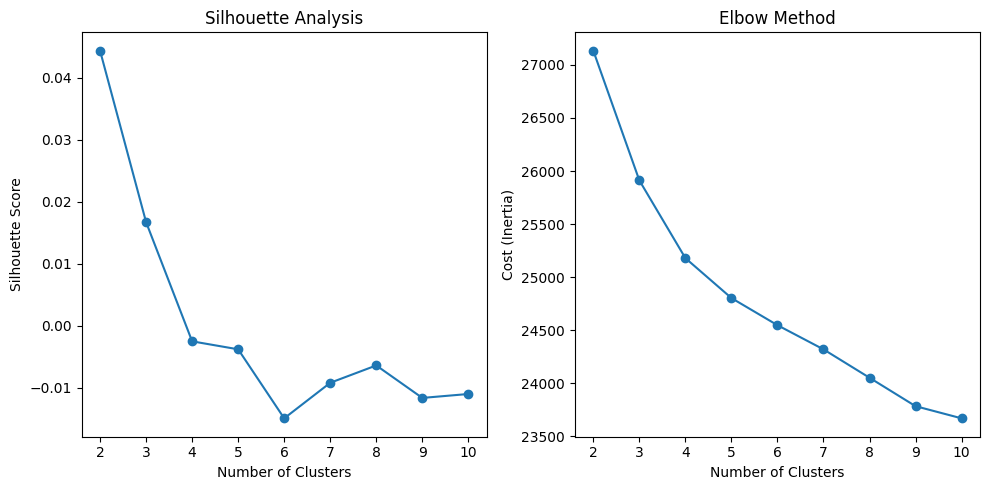

Optimal number of clusters (Silhouette Score): 2
Silhouette scores: [0.04435296737698873, 0.016696999134762747, -0.0025240223680551956, -0.0038096928823335144, -0.014944937657995082, -0.009209219572166782, -0.0064119447022818405, -0.011651465406017667, -0.011018247610516863]
Cost values (Inertia): [27133.74725889414, 25912.10205043957, 25179.939438037592, 24803.766489928, 24548.20110224733, 24320.473575195967, 24053.095029368982, 23785.256032555986, 23670.698260797988]


In [ ]:
# 2. Choose Max Clusters:
max_clusters = 10

# 3. Evaluate K-Prototype Clustering:
silhouette_scores, cost_values = evaluate_k_prototype(data_encoded, categorical_indices, max_clusters)

# 4. Analyze the Results:
# Find the optimal number of clusters based on the silhouette scores and elbow method
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we start from k=2

print(f"Optimal number of clusters (Silhouette Score): {optimal_k}")
print(f"Silhouette scores: {silhouette_scores}")
print(f"Cost values (Inertia): {cost_values}")


In [ ]:
# Analyze the clusters
# You can use various techniques to analyze the clusters, such as:

# - Computing descriptive statistics for each cluster
# - Visualizing the clusters using scatter plots or other methods
# - Identifying the most influential variables for each cluster using techniques like ANOVA or feature importance

# Further analysis and segmentation can be done based on the cluster characteristics and your specific goals.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select non-categorical and non-null numerical columns
numerical_cols = merged_dataset.select_dtypes(include=['number']).columns
non_null_numerical_cols = [col for col in numerical_cols if col not in ['Response ID', 'Veh 1 Total Price', 'First Vehicle Total Price', 'Do you know  First Vehicle Total Price']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_dataset[non_null_numerical_cols])




**Modeling:**

**(PCA)**

**Kmean clustering**

Data 2: Understanding the impact of public charging infrastructure on the consideration to purchase an electric vehicle in California -> https://datadryad.org/stash/dataset/doi:10.25338/B8035D

In [ ]:

data2 = pd.read_excel("https://datadryad.org/stash/downloads/file_stream/2211655")

data2.head()

In [ ]:
data2.info()

In [ ]:
data2["id"] = data2["id"].astype(str)

##### Demographic Information:
- id: Identifier for each respondent.
- age: Age of the respondent.
- maledummy: Binary variable indicating gender (1 for male, 0 for female).
- Familiarity and Experience:
- PHEVfamiliarity: Level of familiarity with PHEVs.
- BEVfamiliarity: Level of familiarity with BEVs.
- PHEVexperience: Level of experience with PHEVs.
- BEVexperience: Level of experience with BEVs.
##### Attitudes and Behavior:
- fuelaphev: Fuel type familiarity with PHEVs.
- fuelabev: Fuel type familiarity with BEVs.
- nameabev: Brand familiarity with BEVs.
- nameaphev: Brand familiarity with PHEVs.
- infosearch: Level of information search regarding EVs.
- BEVpositiveconvo: Positive conversations about BEVs.
- PHEVpositiveconvo: Positive conversations about PHEVs.
- numofincentives: Number of incentives considered for EV purchase.
- advertaware: Awareness of EV-related advertisements.
- HOVlaneuse: Usage of HOV lanes.
- income: Household income level.
- electricityaccess: Access to electricity.
##### Charging Infrastructure:
- Various columns related to the density of charging infrastructure per capita, at workplaces, and in different areas.
- Market Considerations:
- Columns related to considerations and perceptions regarding charging convenience, vehicle range, pricing, safety, environmental impact, and market feasibility for both BEVs and PHEVs.
##### Consideration of Purchasing:
ordBEVconsider: Ordinal variable indicating the consideration of purchasing a BEV.
- ordPHEVconsider: Ordinal variable indicating the consideration of purchasing a PHEV.
- seeEVSE: Whether the respondent sees electric vehicle supply equipment (EVSE).


In [ ]:
Alternative_Fueling_Stations = pd.read_csv("Alternative_Fueling_Stations_-6669030252532885733-2.csv")
Alternative_Fueling_Stations.head()

<ipython-input-60-b637c1171cdc>:1: DtypeWarning:

Columns (0,3,4,10,12,13,15,22,26,27,29,31,32,35,37,44,45,46,48,49,50,51,53,54,55,57,58,59,60,61,64,71,72) have mixed types. Specify dtype option on import or set low_memory=False.



,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude,x,y
0,1,private,NaN,NaN,NaN,4/6/2023 12:00:00 AM,NaN,CNG,Private,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916,-86.267021,32.367916
1,2,private,NaN,GOVERNMENT,NaN,2/12/2024 12:00:00 AM,NaN,CNG,Private - Government only,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911,-84.367461,33.821911
2,3,private,NaN,NaN,NaN,12/13/2023 12:00:00 AM,NaN,CNG,Private,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256,-84.543822,33.760256
3,4,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,8/10/2023 12:00:00 AM,NaN,CNG,Public - Credit card at all times,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213,-94.375338,35.362213
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,9/14/2023 12:00:00 AM,NaN,CNG,Public - Credit card at all times,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706,-71.026549,42.374706


In [ ]:
Alternative_Fueling_Stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104196 entries, 0 to 104195
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    104196 non-null  object 
 1   access_code                 104195 non-null  object 
 2   access_days_time            95620 non-null   object 
 3   access_detail_code          7945 non-null    object 
 4   cards_accepted              16057 non-null   object 
 5   date_last_confirmed         103955 non-null  object 
 6   expected_date               13200 non-null   object 
 7   fuel_type_code              104192 non-null  object 
 8   groups_with_access_code     104192 non-null  object 
 9   id                          104192 non-null  float64
 10  maximum_vehicle_class       20147 non-null   object 
 11  open_date                   103898 non-null  object 
 12  owner_type_code             30247 non-null   object 
 13  restricted_acc